![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 5
##### Isidre Munné-Bertran

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).


### Coding Best Practices

In [1]:
# Firstly,libraries:

import pandas as pd # data manipulation and analysis.
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # plots visualizations
import seaborn as sns # HD plots graphics based on matplot
import scipy.stats as stats # statistical functions
from scipy.stats import norm # Specific method
from sklearn.preprocessing import StandardScaler # Standarize the data (normal distribution)
from sklearn.preprocessing import MinMaxScaler # Normalize the data
from sklearn import linear_model # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score # test the Machine Learning model
import warnings # Lastly... no more warnings... HURRAY !!!!
warnings.filterwarnings('ignore')

In [2]:
# Defining our functions:

def explore_data():
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)

def cc(): # cleaning columns
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    print(data.columns)
    print()

### Reading the Data

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv') # Opening the Data
data.sample(5) # random sample

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
4824,LM54297,Nevada,4713.404623,No,Basic,Bachelor,1/15/11,Unemployed,M,0,...,90,0,8,Personal Auto,Personal L3,Offer1,Agent,806.534801,Four-Door Car,Medsize
5394,FY30870,California,18569.500630,No,Extended,High School or Below,2/6/11,Employed,F,32756,...,67,0,2,Personal Auto,Personal L3,Offer1,Agent,381.118731,Two-Door Car,Medsize
643,TN50051,California,2957.764017,No,Basic,Doctor,2/6/11,Employed,F,83318,...,42,0,1,Personal Auto,Personal L1,Offer3,Web,211.336937,Two-Door Car,Medsize
3390,LP76290,Oregon,8246.830811,No,Premium,Master,1/30/11,Employed,M,62588,...,22,0,3,Special Auto,Special L2,Offer4,Web,499.200000,Four-Door Car,Medsize
3372,VY96711,California,19231.772660,No,Premium,Master,2/19/11,Employed,F,99772,...,38,0,2,Corporate Auto,Corporate L2,Offer2,Branch,51.902587,SUV,Medsize


### Exploring the Data

In [4]:
explore_data() # First impression of our data

The dataframe shape is (9134, 24) .
 
The dataframe columns are:
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
 
The dataframe data types are:
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                       

### Cleaning the Data

In [5]:
cc()

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')



In [6]:
print("The following columns are numerical")
num = data.select_dtypes(include= np.number).fillna(0) # We also deal with NaN values
print(num.columns)
print()
print("The following columns are categorical")
cat = data.select_dtypes(exclude=np.number).fillna("")
print(cat.columns)

The following columns are numerical
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

The following columns are categorical
Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


In [7]:
data.sample(10) # we print a larger sample to see the changes, checking for NaN values or any other error

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
6393,LQ71247,Arizona,4524.642758,No,Basic,High School or Below,1/4/11,Unemployed,F,0,...,59,2,3,Personal Auto,Personal L3,Offer1,Agent,490.113784,Four-Door Car,Small
6853,WU76366,Arizona,4983.897914,No,Basic,Bachelor,2/2/11,Employed,M,28726,...,88,0,3,Personal Auto,Personal L1,Offer1,Agent,468.000000,Four-Door Car,Small
1018,EB66698,California,3371.858433,No,Extended,High School or Below,1/27/11,Employed,M,86689,...,72,0,1,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Two-Door Car,Small
7457,IU83998,Washington,11196.460020,No,Premium,Bachelor,1/1/11,Unemployed,F,0,...,94,0,1,Personal Auto,Personal L3,Offer1,Branch,2145.600000,Luxury Car,Medsize
715,MY37953,Arizona,25830.909820,No,Basic,Bachelor,1/31/11,Employed,F,73760,...,3,1,2,Personal Auto,Personal L2,Offer3,Web,230.245772,Sports Car,Medsize
3403,WI65397,Oregon,7627.314790,No,Extended,Bachelor,2/17/11,Employed,F,36084,...,9,1,7,Corporate Auto,Corporate L2,Offer1,Agent,152.779038,Two-Door Car,Medsize
5414,GF38306,Nevada,7758.588506,No,Extended,High School or Below,2/8/11,Employed,F,96162,...,91,0,4,Corporate Auto,Corporate L3,Offer2,Agent,376.569009,Four-Door Car,Small
439,VQ38776,Oregon,5303.759534,No,Extended,College,1/2/11,Unemployed,F,0,...,63,0,3,Personal Auto,Personal L3,Offer2,Agent,395.341110,Four-Door Car,Large
5642,CK85904,California,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,11432,...,9,0,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,SUV,Small
8454,BQ32117,California,12731.951610,Yes,Basic,Doctor,1/14/11,Employed,M,40870,...,56,0,2,Personal Auto,Personal L1,Offer1,Agent,504.000000,SUV,Large


### Specific for this Lab
(_Further processing..._)

- X-y split.
- Normalize (numerical).

### X-y split

The following is a descriptive answer, since we don´t have a defined target in this dataset.

In [8]:
## y = data['TARGET_D'] # We store the target of our analysis in Y
## x = data.drop(['TARGET_D'], axis=1) # And then, we store all features in X (excluding the target)

### As best practicse, it is not recommended to do transformations to the target

### Normalize

* We don't use the normalizer (it will normalize rows, not the columns)
* Instead, we will use MinMaxScaler

In [9]:
transformer = MinMaxScaler().fit(num) # We use it to normalize
x_minmax = transformer.transform(num)
print(x_minmax.shape)

(9134, 8)


In [10]:
# We convert it to a DataFrame
num_norm = pd.DataFrame(x_minmax, columns=num.columns) # Selecting x_num.columns for our columns
num_norm.sample(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
7534,0.007826,0.692722,0.008439,0.085714,0.303030,0.0,0.000,0.125268
1742,0.036490,0.449425,0.000000,0.257143,0.606061,0.0,0.375,0.123681
6449,0.088209,0.698663,0.223629,0.428571,0.424242,0.4,0.250,0.084400
5356,0.019684,0.000000,0.135021,0.114286,0.636364,0.0,0.000,0.154262
7113,0.081672,0.530651,0.215190,0.857143,0.303030,0.4,0.250,0.185785


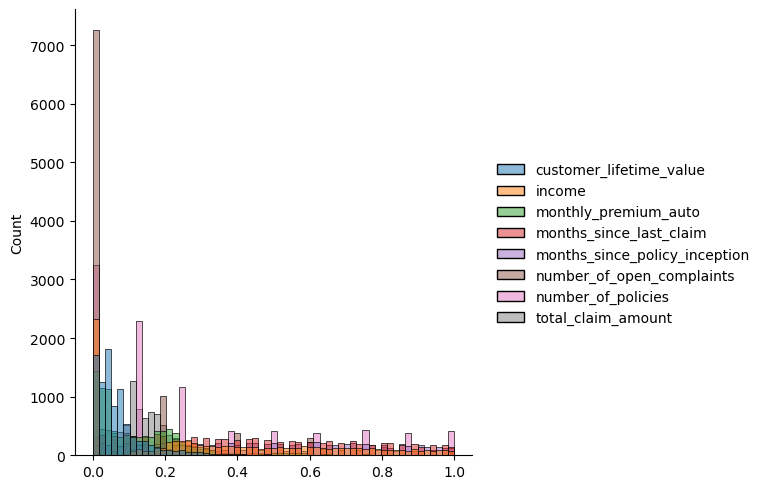

In [11]:
# What if we plot it?
sns.displot(num_norm)

In [12]:
# Now the X axis changed to 0 to 1. We normalized them !